# Cancer death stats in Poland for 1990-2016 Analysis

Link to dataset: https://ourworldindata.org/cancer

Legend:
- abdomen - the area of the body that contains the pancreas, stomach, intestines, liver, gallbladder, and other organs

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset from csv file

In [2]:
cancer_dataset = pd.read_csv('Cancer_Deaths_by_Type.csv')
cancer_dataset.head()

,Entity,Code,Year,Other cancers (deaths),Gallbladder cancer (deaths),Larynx cancer (deaths),Other pharynx cancer (deaths),Kidney cancer (deaths),Ovarian cancer (deaths),Lip and oral cavity cancer (deaths),...,Cervical cancer (deaths),Leukemia (deaths),Prostate cancer (deaths),Pancreatic cancer (deaths),Esophageal cancer (deaths),Breast cancer (deaths),Liver cancer (deaths),Colon and rectum cancer (deaths),Stomach cancer (deaths),"Tracheal, bronchus, and lung cancer (deaths)"
0,Afghanistan,AFG,1990,897,118,109,41,39,69,54,...,317,728,130,126,189,767,244,442,923,797
1,Afghanistan,AFG,1991,952,125,117,43,41,74,57,...,336,766,140,134,200,823,261,476,990,853
2,Afghanistan,AFG,1992,1029,135,128,46,44,80,62,...,362,821,152,144,215,901,284,522,1078,928
3,Afghanistan,AFG,1993,1122,148,141,50,47,87,68,...,394,891,168,157,234,996,313,577,1192,1018
4,Afghanistan,AFG,1994,1219,161,156,54,51,93,73,...,428,965,185,170,254,1098,343,635,1317,1111


### Return information about dataset

In [3]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535 entries, 0 to 5534
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entity                                        5535 non-null   object
 1   Code                                          5292 non-null   object
 2   Year                                          5535 non-null   int64 
 3   Other cancers (deaths)                        5535 non-null   int64 
 4   Gallbladder cancer (deaths)                   5535 non-null   int64 
 5   Larynx cancer (deaths)                        5535 non-null   int64 
 6   Other pharynx cancer (deaths)                 5535 non-null   int64 
 7   Kidney cancer (deaths)                        5535 non-null   int64 
 8   Ovarian cancer (deaths)                       5535 non-null   int64 
 9   Lip and oral cavity cancer (deaths)           5535 non-null   int64 
 10  

### Clean dataset

In [4]:
cancer_dataset = cancer_dataset.dropna()

### Change column name for better readability

In [5]:
cancer_dataset.rename(columns={'Entity': 'Country'}, inplace=True)

### Prediscribe abdomen column list

In [6]:
abdomen_cancer_columns = [
    'Gallbladder cancer (deaths)', 
    'Bladder cancer (deaths)', 
    'Pancreatic cancer (deaths)', 
    'Liver cancer (deaths)', 
    'Stomach cancer (deaths)',
    'Kidney cancer (deaths)']

### New DataFrame for only abdomen cancers deaths

In [7]:
abdomen_cancer_worldwide = cancer_dataset[abdomen_cancer_columns]
abdomen_cancer_worldwide.head()

,Gallbladder cancer (deaths),Bladder cancer (deaths),Pancreatic cancer (deaths),Liver cancer (deaths),Stomach cancer (deaths),Kidney cancer (deaths)
0,118,148,126,244,923,39
1,125,157,134,261,990,41
2,135,169,144,284,1078,44
3,148,184,157,313,1192,47
4,161,200,170,343,1317,51


### Return sum for all abdomen cancers deaths worldwide

In [8]:
abdomen_cancer_worldwide.sum()

Gallbladder cancer (deaths)     4402644
Bladder cancer (deaths)         7898730
Pancreatic cancer (deaths)     15901327
Liver cancer (deaths)          35174683
Stomach cancer (deaths)        44267418
Kidney cancer (deaths)          5245284
dtype: int64

### Sum cancers deaths cases for every country

In [9]:
cols = cancer_dataset.columns[3:]

In [10]:
sum_cancers_worldwide = cancer_dataset.groupby('Country').agg({c:['sum'] for c in cols})
sum_cancers_worldwide.head()

,Other cancers (deaths),Gallbladder cancer (deaths),Larynx cancer (deaths),Other pharynx cancer (deaths),Kidney cancer (deaths),Ovarian cancer (deaths),Lip and oral cavity cancer (deaths),Bladder cancer (deaths),Brain and nervous system cancer (deaths),Non-Hodgkin lymphoma (deaths),Cervical cancer (deaths),Leukemia (deaths),Prostate cancer (deaths),Pancreatic cancer (deaths),Esophageal cancer (deaths),Breast cancer (deaths),Liver cancer (deaths),Colon and rectum cancer (deaths),Stomach cancer (deaths),"Tracheal, bronchus, and lung cancer (deaths)"
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,45841,6149,6130,1927,2030,3848,2788,7666,9735,9218,15121,36904,7643,7068,9562,46623,14062,26031,51659,44226
Albania,11545,344,2081,605,1561,1147,1122,612,5240,1248,1520,3837,6136,4142,1327,4727,7952,5211,10987,21313
Algeria,56503,6248,6499,3481,3746,6298,3528,8550,11874,19560,13064,20066,13597,16234,5149,40202,11549,33160,28134,41830
American Samoa,189,27,0,15,0,37,12,12,27,27,27,28,95,35,0,108,87,97,110,190
Andorra,475,36,27,27,95,132,42,136,111,157,41,165,332,259,129,349,97,504,224,692


### Filter by Country column - only Poland

In [11]:
poland_stats = cancer_dataset[cancer_dataset['Country'] == 'Poland']

### Sum all abdomen cancer deaths for Poland in 1990-2016

In [12]:
abdomen_cancer_poland = poland_stats[abdomen_cancer_columns].sum()
abdomen_cancer_poland

Gallbladder cancer (deaths)     22385
Bladder cancer (deaths)         79596
Pancreatic cancer (deaths)     126118
Liver cancer (deaths)           49952
Stomach cancer (deaths)        179858
Kidney cancer (deaths)          69563
dtype: int64

### Pie plot for abdomen cancer death in Poland

<Axes: >

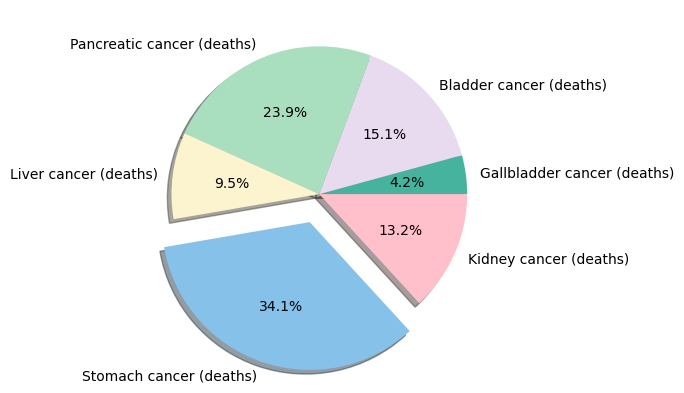

In [13]:
explode = (0, 0, 0, 0, 0.2, 0) #only explode the largest (stomach cancer)
abdomen_cancer_poland.plot.pie(explode=explode, shadow=True, autopct='%1.1f%%', colors=['#45B39D', '#E8DAEF', '#A9DFBF', '#FCF3CF', '#85C1E9', 'pink'])

### Return the highest death abdominal cancer type in Poland

In [14]:
highest_abdominal_cancer_poland = abdomen_cancer_poland.idxmax()
highest_abdominal_cancer_poland

'Stomach cancer (deaths)'

### Return the lowest death abdominal cancer type in Poland

In [15]:
lowest_abdominal_cancer_poland = abdomen_cancer_poland.idxmin()
lowest_abdominal_cancer_poland

'Gallbladder cancer (deaths)'

### Plot for every abdomen cancer death case in Poland by year

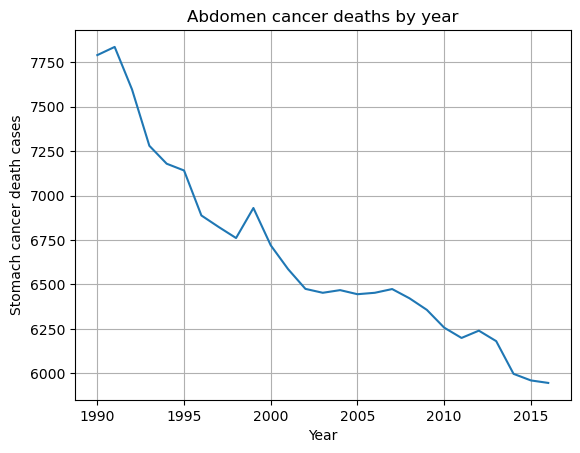

In [16]:
year = poland_stats['Year']
cancer_type = poland_stats[highest_abdominal_cancer_poland] 

fig, ax = plt.subplots()
ax.plot(year, cancer_type)

ax.set(xlabel='Year', ylabel='Stomach cancer death cases',
       title='Abdomen cancer deaths by year')
ax.grid()

plt.show()

### Boxplot for the highest abdominal cancer deaths vs colon and rectum cancer deaths in Poland

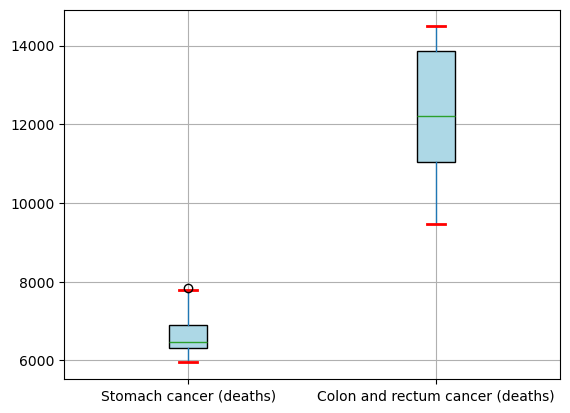

In [17]:
bplot = poland_stats.boxplot(column=[highest_abdominal_cancer_poland, 'Colon and rectum cancer (deaths)'], 
                    vert=True,
                    patch_artist = True,
                    boxprops = dict(facecolor = "lightblue"),
                    capprops = dict(color = "red", linewidth = 2))

### Histograms for prostate and breast cancer deaths cases in 2016 for Poland

array([[<Axes: title={'center': 'Prostate cancer (deaths)'}>]],
      dtype=object)

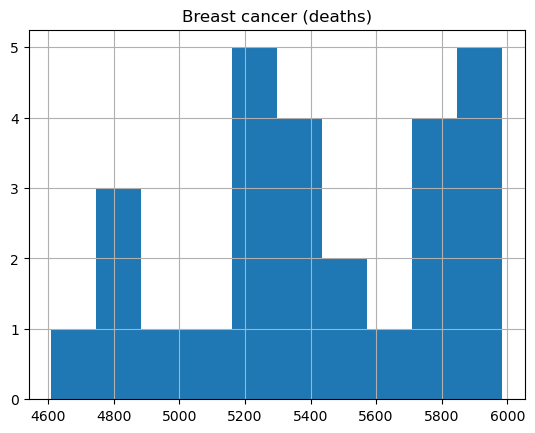

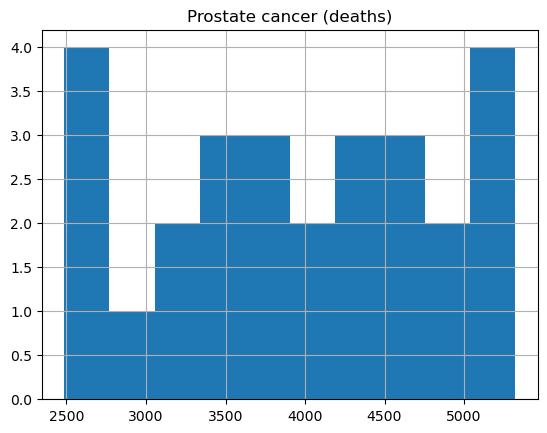

In [18]:
poland_stats[['Breast cancer (deaths)']].hist()
poland_stats[['Prostate cancer (deaths)']].hist()

### Import new dataset with survival cancer rates worldwide 

In [19]:
cancer_survival_rates = pd.read_csv('cancer_survival_rates.csv')
cancer_survival_rates.head()

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Argentina,ARG,2004,75.5,52.0,46.0,NaN,NaN,20.8,26.8,85.0,44.4,19.2
4,Argentina,ARG,2009,76.6,50.6,40.6,90.0,24.2,11.9,29.7,86.6,31.0,16.0


### Change column name for consistency

In [20]:
cancer_survival_rates.rename(columns={'Entity': 'Country'}, inplace=True)
cancer_survival_rates.head()

,Country,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Argentina,ARG,2004,75.5,52.0,46.0,NaN,NaN,20.8,26.8,85.0,44.4,19.2
4,Argentina,ARG,2009,76.6,50.6,40.6,90.0,24.2,11.9,29.7,86.6,31.0,16.0


### Return the newset cancer survival rates for Poland 

In [26]:
poland_survival_stats = cancer_survival_rates[cancer_survival_rates['Country'] == 'Poland']

### Merge two datasets for Poland

In [29]:
merged_datasets = pd.merge(poland_stats, poland_survival_stats, on='Year')
merged_datasets

,Country_x,Code_x,Year,Other cancers (deaths),Gallbladder cancer (deaths),Larynx cancer (deaths),Other pharynx cancer (deaths),Kidney cancer (deaths),Ovarian cancer (deaths),Lip and oral cavity cancer (deaths),...,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Poland,POL,1999,7468,757,1888,633,2429,2526,1206,...,66.9,50.0,40.0,44.1,7.9,11.4,30.6,54.3,36.7,14.2
1,Poland,POL,2004,8078,674,1774,719,2587,2731,1282,...,72.3,51.7,45.7,44.5,9.2,11.7,32.8,68.5,42.8,15.7
2,Poland,POL,2009,8657,712,1718,846,2894,2906,1444,...,74.1,53.0,50.1,49.0,10.4,13.4,34.3,74.1,46.9,18.6
